In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
hand = 0
subject = 1
data_dir = "Z:\Desktop\\"

In [3]:
if hand == 0:
    file_name = "sub_{}_left.npz".format(str(subject))
    print("processing file :", file_name)

else:
    file_name = "sub_{}_right.npz".format(str(subject))
    print("processing file :", file_name)


dataset = np.load(os.path.join(data_dir, file_name))

X = dataset["X_train"]
X = np.swapaxes(X, 2, -1).squeeze()
del dataset

processing file : sub_1_left.npz


In [4]:
sf = 250
data = X[100, 20, :]
print(data.shape)
time = np.arange(data.size) / sf

(250,)


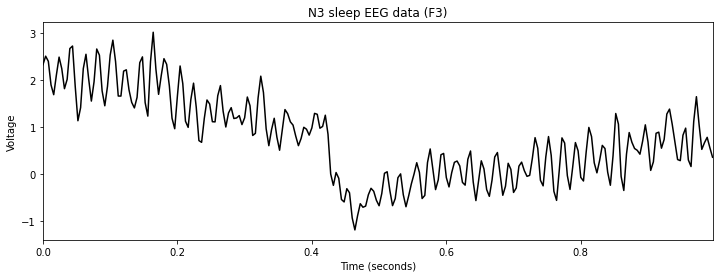

In [5]:
 # Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('N3 sleep EEG data (F3)')
plt.show()

In [31]:
from scipy.signal import welch


nperseg = 250/2
noverlap = None # nperseg // 2
freqs, psd = welch(data, sf, nperseg=nperseg, noverlap=noverlap)  # win = Hann  


# Find closest indices of band in frequency vector
idx_band = np.logical_and(freqs >= 1., freqs <= 70.)

psd = psd[idx_band]
freqs = freqs[idx_band]
print(freqs.shape)
print(freqs)
print(psd.shape)
print(psd)

(35,)
[ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34. 36.
 38. 40. 42. 44. 46. 48. 50. 52. 54. 56. 58. 60. 62. 64. 66. 68. 70.]
(35,)
[0.07059308 0.03056179 0.01273889 0.0049126  0.00574082 0.0040808
 0.00193228 0.00026108 0.00080691 0.0023409  0.00077389 0.00040019
 0.00146271 0.0011095  0.00035042 0.00090689 0.00040731 0.00028235
 0.00030856 0.00072994 0.00131439 0.00125731 0.00108943 0.00890145
 0.01586822 0.00611329 0.00040424 0.0014047  0.00104623 0.00136582
 0.00156529 0.00100868 0.0010116  0.00054132 0.00097514]


In [34]:
from mne.time_frequency import psd_array_welch


nperseg = 250/2
noverlap = None # nperseg // 2
psd_mne, freqs_mne = psd_array_welch(data, 250, 1., 70., n_per_seg=int(250/2),
                          n_overlap=int(250/4), n_jobs=1)

print(freqs_mne.shape)
print(psd_mne.shape)



(70,)
(70,)


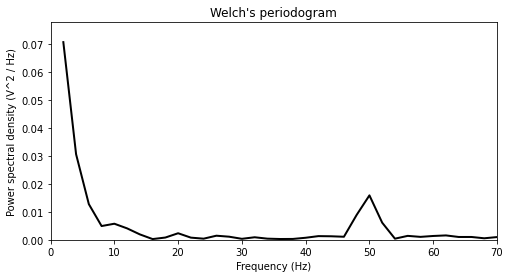

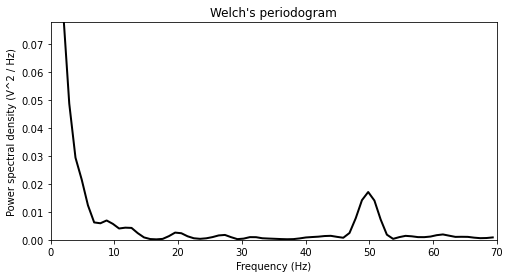

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
plt.show()
# mne
plt.figure(figsize=(8, 4))
plt.plot(freqs_mne, psd_mne, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
plt.show()

logical map for bands (1,4):
 [ True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


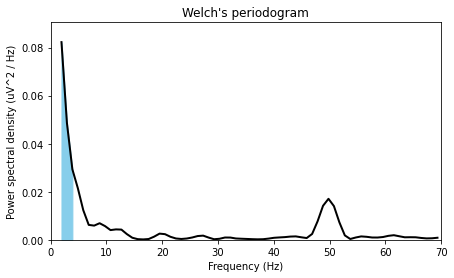

logical map for bands (4,8):
 [False False False  True  True  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


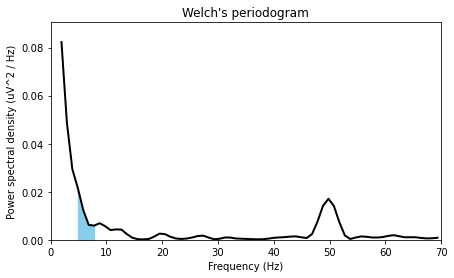

logical map for bands (8,10):
 [False False False False False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


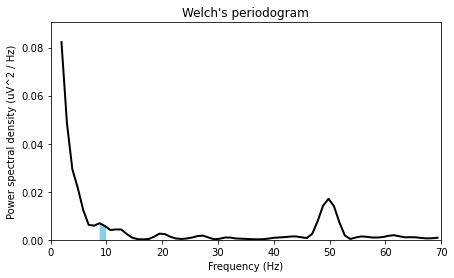

logical map for bands (10,13):
 [False False False False False False False False False  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


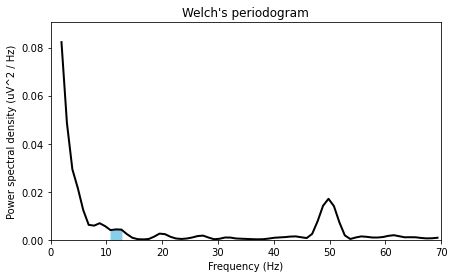

logical map for bands (13,30):
 [False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


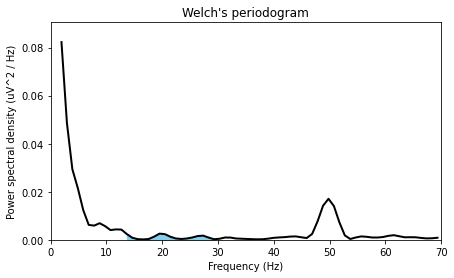

logical map for bands (30,70):
 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


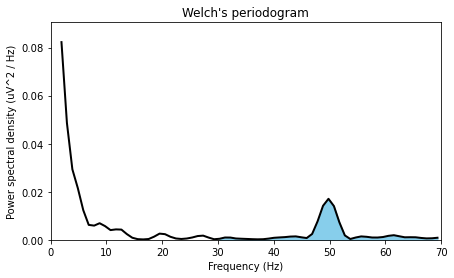

In [38]:
for low, high in [(1, 4), (4, 8), (8, 10), (10, 13), (13, 30),
                  (30, 70)]:
    # Find intersecting values in frequency vector
    idx_delta = np.logical_and(freqs_mne >= low, freqs_mne <= high)
    print("logical map for bands ({},{}):\n {}".format(low, high, idx_delta))

    plt.figure(figsize=(7, 4))
    plt.plot(freqs_mne, psd_mne, lw=2, color='k')
    plt.fill_between(freqs_mne, psd_mne, where=idx_delta, color='skyblue')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (uV^2 / Hz)')
    plt.xlim([0, 70])
    plt.ylim([0, psd_mne.max() * 1.1])
    plt.title("Welch's periodogram")
    plt.show()


In [40]:
from scipy.integrate import simps
for low, high in [(1, 4), (4, 8), (8, 10), (10, 13), (13, 30),
                  (30, 70)]:
    print("processing bands (low, high) : ({},{})".format(low, high))
    # Find intersecting values in frequency vector
    idx_delta = np.logical_and(freqs_mne >= low, freqs_mne <= high)
      # Frequency resolution
    freq_res = freqs_mne[1] - freqs_mne[0]  # = 1 / 4 = 0.25

    # Compute the absolute power by approximating the area under the curve
    power = simps(psd_mne[idx_delta], dx=freq_res)
    print('Absolute power: {:.4f} uV^2'.format(power))
    
    total_power = simps(psd_mne, dx=freq_res)
    rel_power = power / total_power
    
    print('Relative power: {:.4f}'.format(rel_power))
    
    

processing bands (low, high) : (1,4)
Absolute power: 0.0996 uV^2
Relative power: 0.3399
processing bands (low, high) : (4,8)
Absolute power: 0.0308 uV^2
Relative power: 0.1049
processing bands (low, high) : (8,10)
Absolute power: 0.0062 uV^2
Relative power: 0.0210
processing bands (low, high) : (10,13)
Absolute power: 0.0083 uV^2
Relative power: 0.0284
processing bands (low, high) : (13,30)
Absolute power: 0.0165 uV^2
Relative power: 0.0561
processing bands (low, high) : (30,70)
Absolute power: 0.0921 uV^2
Relative power: 0.3140


## Core Function

In [56]:
def bandpower_1d(data, sf, band, nperseg=250, relative=False):
    """
        Compute the average power of the signal x in a specific frequency band.
        https://raphaelvallat.com/bandpower.html
    Args:
        data (1d-array):
            Input signal in the time-domain.
        sf (float):
            Sampling frequency of the data.
        band (list):
            Lower and upper frequencies of the band of interest.
        window_sec (float):
            Length of each window in seconds.
            If None, window_sec = (1 / min(band)) * 2
        relative (boolean):
            If True, return the relative power (= divided by the total power of the signal).
            If False (default), return the absolute power.

    Returns:
        bp (float):
            Absolute or relative band power.
    """

    # band = np.asarray(band)
    low, high = band

    # Compute the modified periodogram (Welch)
    psd, freqs = psd_array_welch(data, sf, 1., 70., n_per_seg=int(250/2),
                          n_overlap=int(250/4), n_jobs=1)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp


# def bandpower(x, fs, bands, window_sec=None, relative=True):
#         # x shape [n_epoch, n_ channle, n_times]
#         # bandpower [n_epoch, n_channel, 1]
#         n_epoch, n_channel, _ = x.shape
#         bp = np.zeros((n_epoch, n_channel, 1))
#         for idx, b in enumerate(bands):
#             print(b)
#             print(idx)
#             for epoch in range(n_epoch):
#                 for channel in range(n_channel):
#                     bp[epoch, channel] = bandpower_1d(x[epoch, channel, idx], fs, [fmax, fmin],
#                                                         window_sec=window_sec, relative=relative)
#
#         return bp


def bandpower(x, fs, fmin, fmax, nperseg=250, relative=True):
    """
    Compute the average power of the multi-channel signal x in a specific frequency band.
    Args:
        x (nd-array): [n_epoch, n_channel, n_times]
           The epoched input data.
        fs (float):
            Sampling frequency of the data.
        fmin (int): Low-band frequency.
        fmax (int): High-band frequency.
        window_sec (float):
            Length of each window in seconds.
            If None, window_sec = (1 / min(band)) * 2
        relative (boolean):
            If True, return the relative power (= divided by the total power of the signal).
            If False (default), return the absolute power.

    Returns:
        bp (nd-array): [n_epoch, n_channel, 1]
            Absolute or relative band power.
    """
    n_epoch, n_channel, _ = x.shape

    bp = np.zeros((n_epoch, n_channel, 1))
    for epoch in range(n_epoch):
        for channel in range(n_channel):
            bp[epoch, channel] = bandpower_1d(
                x[epoch, channel, :],
                fs,
                [fmin, fmax],
                nperseg=nperseg,
                relative=relative,
            )

    return bp


def bandpower_multi(x, fs, bands,  nperseg=250, relative=True):
    """
    Compute the average power of the multi-channel signal x in multiple frequency bands.
    Args:
        x (nd-array): [n_epoch, n_channel, n_times]
           The epoched input data.
        fs (float):
            Sampling frequency of the data.
        bands (list): list of bands to compute the bandpower. echa band is a tuple of fmin and fmax.
        window_sec (float):
            Length of each window in seconds.
            If None, window_sec = (1 / min(band)) * 2
        relative (boolean):
            If True, return the relative power (= divided by the total power of the signal).
            If False (default), return the absolute power.

    Returns:
        bp (nd-array): [n_epoch, n_channel, n_bands]
            Absolute or relative bands power.
    """
    n_epoch, n_channel, _ = x.shape
    bp_list = []
    for idx, band in enumerate(bands):
        fmin, fmax = band
        bp_list.append(
            bandpower(
                x, fs, fmin, fmax,  nperseg=nperseg, relative=relative
            )
        )

    bp = np.concatenate(bp_list, -1)

    return bp


In [57]:
### all channels for 1 epoch
fs = 250
nperseg = 250/2
data = X[1000, :, :].squeeze()
print(data.shape)
data = np.expand_dims(data, 0)
bands = [(1, 4), (4, 8), (8, 10), (10, 13), (13, 30), (30, 70)]
bp = bandpower_multi(data, fs, bands,  nperseg=nperseg, relative=True).squeeze()
print(bp.shape)

(204, 250)
(204, 6)


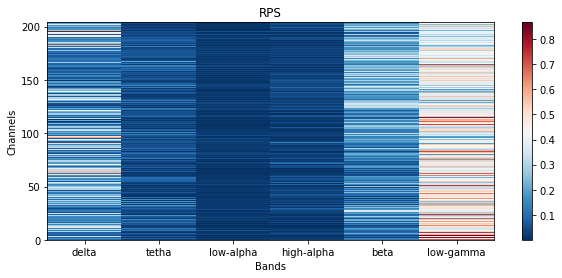

In [58]:
fig = plt.figure(figsize=[10, 4])
cmap = "RdBu_r"
im = plt.pcolormesh(bp, cmap=cmap)
fig.colorbar(im)
plt.title("RPS")
plt.ylabel("Channels")
plt.xlabel("Bands")
plt.locator_params(axis="y", nbins=5)
plt.xticks(
    [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
    ["delta", "tetha", "low-alpha", "high-alpha", "beta", "low-gamma"],
)
plt.show()

# More samples from 2 different subjects.
## sub 1

In [59]:
if hand == 0:
    rps_name = "sub_{}_left_rps.npz".format(str(subject))
else:
    rps_name = "sub_{}_right_rps.npz".format(str(subject))

In [60]:
# import y
dataset = np.load(os.path.join(data_dir, file_name))

y_train = dataset["y_train"]

In [61]:
import random 

print(X.shape[0])

epochs = random.sample(range(X.shape[0]), 6)
epochs

8064


[3185, 6254, 4076, 2237, 1151, 7926]

rps : ['rps_train', 'rps_val', 'rps_test']
bp_statistics
global mean 0.12527277959979122
global min 0.0001152190630017561
global max 0.8700564503669739
global std 0.12212398424468669


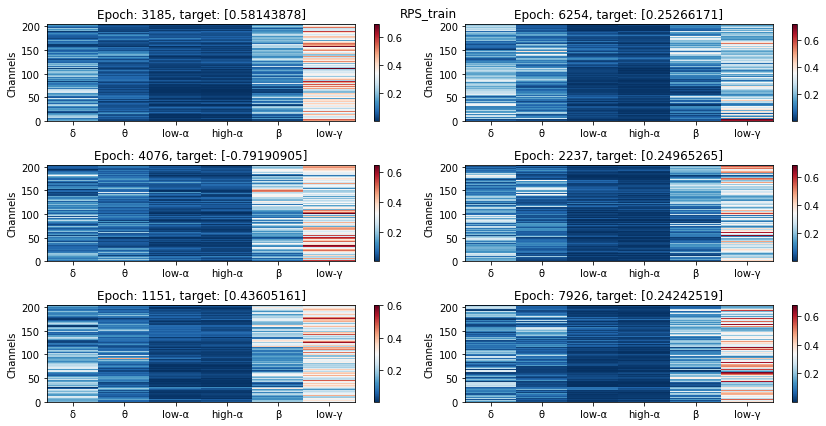

In [62]:
bands = [(1, 4), (4, 8), (8, 10), (10, 13), (13, 30), (30, 70)]

rps_data = np.load(os.path.join(data_dir, rps_name))

print("rps :", rps_data.files)

bp = rps_data["rps_train"]
print("bp_statistics")
print("global mean", np.mean(bp))
print("global min", np.min(bp))
print("global max", np.max(bp))
print("global std", np.std(bp))

fig, axs = plt.subplots(3, 2, figsize=[12, 6])
fig.suptitle("RPS_train")
cmap = "RdBu_r"
for e, ax in zip(epochs, axs.ravel()):
    im = ax.pcolormesh(bp[e, ...],  cmap=cmap)
    fig.colorbar(im, ax=ax)
    ax.set_ylabel("Channels")
    # ax.set_xlabel("Bands")
    ax.locator_params(axis="y", nbins=5)
    ax.set_xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
    ax.set_xticklabels(["\u03B4", "\u03B8", "low-\u03B1",
                        "high-\u03B1", "\u03B2", "low-\u03B3"],)
    ax.set_title("Epoch: {}, target: {}".format(e, y_train[e]))
# plt.savefig(os.path.join(figure_dir, "RPS_epoch_{}_hand_{}.pdf"
#                          .format(epoch, "right" if hand == 1 else "left")))
plt.tight_layout()
plt.show()

### SUB 8

In [63]:
# import rps
bp = np.load(os.path.join(data_dir, 'sub_8_left_rps.npz'))["rps_train"]

In [64]:
# Random epoch 

import random 

print(X.shape[0])

epochs = random.sample(range(X.shape[0]), 6)
epochs

8064


[1260, 1164, 2954, 3577, 7656, 3911]

rps : ['rps_train', 'rps_val', 'rps_test']
bp_statistics
global mean 0.12527277959979122
global min 0.0001152190630017561
global max 0.8700564503669739
global std 0.12212398424468669


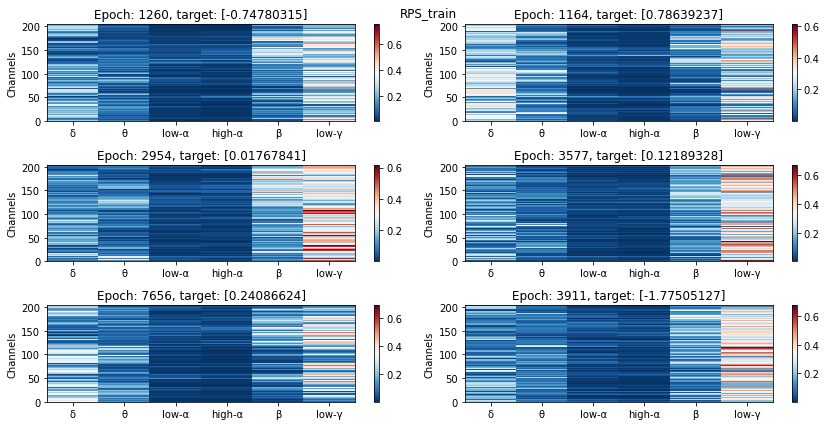

In [65]:
bands = [(1, 4), (4, 8), (8, 10), (10, 13), (13, 30), (30, 70)]

rps_data = np.load(os.path.join(data_dir, rps_name))

print("rps :", rps_data.files)

bp = rps_data["rps_train"]
print("bp_statistics")
print("global mean", np.mean(bp))
print("global min", np.min(bp))
print("global max", np.max(bp))
print("global std", np.std(bp))

fig, axs = plt.subplots(3, 2, figsize=[12, 6])
fig.suptitle("RPS_train")
cmap = "RdBu_r"
for e, ax in zip(epochs, axs.ravel()):
    im = ax.pcolormesh(bp[e, ...],  cmap=cmap)
    fig.colorbar(im, ax=ax)
    ax.set_ylabel("Channels")
    # ax.set_xlabel("Bands")
    ax.locator_params(axis="y", nbins=5)
    ax.set_xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
    ax.set_xticklabels(["\u03B4", "\u03B8", "low-\u03B1",
                        "high-\u03B1", "\u03B2", "low-\u03B3"],)
    ax.set_title("Epoch: {}, target: {}".format(e, y_train[e]))
# plt.savefig(os.path.join(figure_dir, "RPS_epoch_{}_hand_{}.pdf"
#                          .format(epoch, "right" if hand == 1 else "left")))
plt.tight_layout()
plt.show()